In [1]:
!pip install tensorflow==2.15
!pip install qutip==4.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
import os
import sys
import csv
import math
import time
import re
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed
from tensorflow.keras import backend as K
#from keras.layers.preprocessing import preprocessing_utils

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#!pip install qutip
import qutip as qt
qt.__version__

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


'4.7.6'

In [5]:
sys.path.append('/content/gdrive/MyDrive/git/quantumML/python/sdes')
import sde_solve
import sde_systems
import data_gen

sys.path.append('/content/gdrive/MyDrive/git/quantumML/python/systems')
import rabi_weak_meas

sys.path.append('/content/gdrive/MyDrive/git/quantumML/python/models')
import fusion
import flex

sys.path.append('/content/gdrive/MyDrive/git/quantumML/python/models/test')
import test_fusion

In [6]:
import imp
imp.reload(fusion)
imp.reload(flex)
imp.reload(sde_systems)
imp.reload(data_gen)
imp.reload(sde_solve)
imp.reload(test_fusion)

<module 'test_fusion' from '/content/gdrive/MyDrive/git/quantumML/python/models/test/test_fusion.py'>

In [7]:
mint = 0
maxt = 1.0
deltat = 2**(-8)
tvec = np.arange(mint,maxt,deltat)
seq_len = tvec.shape[0]

num_meas = 1
meas_op = [0,1]
num_features = 2
strong_probs = []
input_params = [4]
num_params = len(input_params)

sx, sy, sz = sde_systems.paulis()
rho0 = sde_systems.get_init_rho(sx, sy, 0, 0)

params = np.array([1.395,4.0*2.0*0.83156,0.1469,0.0,0.1], dtype=np.double)

model = flex.build_datagen_model(seq_len, num_features, rho0, num_params, params, deltat, num_traj=1, start_meas=0,
                                 sim_noise=True, comp_iq=True, strong_probs=strong_probs, num_meas=num_meas, meas_op=meas_op,
                                 input_params=input_params, return_wvec=True)

model.summary()

l48 t =  Tensor("physical_layer/euler_flex_rnn_cell/strided_slice_8:0", shape=(), dtype=float32)
l48 t =  0.0
l48 t =  0.0
l48 t =  Tensor("physical_layer/while/euler_flex_rnn_cell/strided_slice_12:0", shape=(), dtype=float32)
l48 t =  0.0
l48 t =  0.0
Model: "data_gen_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 tf.compat.v1.shape (TFOpLa  (2,)                         0         ['input_1[0][0]']             
 mbda)                                                                                            
                                                                                                  
 tf.compat.v1.shape_1 (TFOp  (

In [8]:
# Vary epsilon
num_traj = 10

epsilons = np.arange(0.0, 2.0, 0.05)
epsilons_traj = tf.repeat(epsilons, repeats=num_traj, axis=0)[:,tf.newaxis]
print(epsilons_traj.shape)

all_params = epsilons[:,tf.newaxis]
all_params_traj = epsilons_traj

(400, 1)


In [9]:
model_out = model.predict(all_params_traj)
#model_out = model(all_params_traj[:3,:])

l48 t =  Tensor("data_gen_model/physical_layer/euler_flex_rnn_cell/strided_slice_8:0", shape=(), dtype=float32)
l48 t =  0.0
l48 t =  0.0
l48 t =  Tensor("data_gen_model/physical_layer/while/euler_flex_rnn_cell/strided_slice_12:0", shape=(), dtype=float32)
l48 t =  0.0
l48 t =  0.0
13/13 [==============================] - 12s 141ms/step


In [10]:
model_out.shape

(400, 256, 2, 5, 1)

In [11]:
# Make sure imaginary part of noise is zero
tf.reduce_max(tf.abs(model_out[:,:,:,-1,:]))

<tf.Tensor: shape=(), dtype=float64, numpy=0.0>

In [13]:
wvec = tf.complex(model_out[:,:,:,-2,:], tf.zeros_like(model_out[:,:,:,-2,:]))
print(wvec.shape, wvec.dtype, type(wvec))

(400, 256, 2, 1) <dtype: 'complex128'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [14]:
r2d_rho0 = tf.repeat(rho0[tf.newaxis,...], all_params_traj.shape[0], axis=0)
meas_op0 = tf.one_hot([meas_op[0]], depth=3)*tf.ones([all_params_traj.shape[0],3], tf.float32)
meas_op1 = tf.one_hot([meas_op[1]], depth=3)*tf.ones([all_params_traj.shape[0],3], tf.float32)
r2d_meas_inputs = tf.concat([tf.repeat(tf.constant(params[0:4], tf.float32)[tf.newaxis,:], all_params_traj.shape[0], axis=0), tf.cast(all_params_traj, tf.float32), meas_op0, meas_op1], axis=1)
r2d_traj_inputs = r2d_meas_inputs
r2d_traj_inputs.shape

TensorShape([400, 11])

In [15]:
r2d_traj_inputs[100:103,:]

<tf.Tensor: shape=(3, 11), dtype=float32, numpy=
array([[1.395  , 6.65248, 0.1469 , 0.     , 0.5    , 1.     , 0.     ,
        0.     , 0.     , 1.     , 0.     ],
       [1.395  , 6.65248, 0.1469 , 0.     , 0.5    , 1.     , 0.     ,
        0.     , 0.     , 1.     , 0.     ],
       [1.395  , 6.65248, 0.1469 , 0.     , 0.5    , 1.     , 0.     ,
        0.     , 0.     , 1.     , 0.     ]], dtype=float32)>

In [16]:
# Run R2D
t0 = time.time()
print('Running run_model_2d...')
rhovec, ivec, _, _ = fusion.run_model_2d(r2d_rho0, r2d_traj_inputs, num_traj=r2d_traj_inputs.shape[0], mint=mint, maxt=maxt, deltat=deltat, sim_noise=True, comp_i=True, wvec=wvec)
print(f'Done. Run time (s): {time.time() - t0}')

Running run_model_2d...
Start rho 2
l48 t =  0.0
l48 t =  0.0390625
l48 t =  0.078125
l48 t =  0.1171875
l48 t =  0.15625
l48 t =  0.1953125
l48 t =  0.234375
l48 t =  0.2734375
l48 t =  0.3125
l48 t =  0.3515625
l48 t =  0.390625
l48 t =  0.4296875
l48 t =  0.46875
l48 t =  0.5078125
l48 t =  0.546875
l48 t =  0.5859375
l48 t =  0.625
l48 t =  0.6640625
l48 t =  0.703125
l48 t =  0.7421875
l48 t =  0.78125
l48 t =  0.8203125
l48 t =  0.859375
l48 t =  0.8984375
l48 t =  0.9375
l48 t =  0.9765625
Rho done
l48 t =  0.0
l48 t =  0.0390625
l48 t =  0.078125
l48 t =  0.1171875
l48 t =  0.15625
l48 t =  0.1953125
l48 t =  0.234375
l48 t =  0.2734375
l48 t =  0.3125
l48 t =  0.3515625
l48 t =  0.390625
l48 t =  0.4296875
l48 t =  0.46875
l48 t =  0.5078125
l48 t =  0.546875
l48 t =  0.5859375
l48 t =  0.625
l48 t =  0.6640625
l48 t =  0.703125
l48 t =  0.7421875
l48 t =  0.78125
l48 t =  0.8203125
l48 t =  0.859375
l48 t =  0.8984375
l48 t =  0.9375
l48 t =  0.9765625
l48 t =  0.0
l48 t =  0

In [17]:
model_out.shape

(400, 256, 2, 5, 1)

In [18]:
ivec.shape

TensorShape([400, 256, 2])

In [19]:
all_params_traj.shape

TensorShape([400, 1])

In [20]:
assert(tf.reduce_max(tf.abs(tf.math.imag(ivec))) < 1.0e-14)
ivec = tf.math.real(ivec)

In [21]:
for paramidx in range(all_params_traj.shape[0]):
    eps = all_params_traj[paramidx,0].numpy()
    print(f'Checking (epsilon) =({eps})...')

    mses = tf.reduce_mean(tf.square(model_out[paramidx,:-1,:,0,0] - ivec[paramidx,1:,:]), axis=0)
    max_mse = tf.reduce_max(mses)
    print(f'Max MSE:{max_mse}, mse shape = {mses.shape}' )
    assert(max_mse <= 1.0e-14)

Checking (epsilon) =(0.0)...
Max MSE:3.1821083097807496e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:1.2355437253893555e-30, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:9.284758742697265e-31, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:5.065271280402916e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:5.824616365142888e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:8.255640319111798e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:1.9815332058285223e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:2.8479594644295643e-32, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:2.0604618155025206e-35, mse shape = (2,)
Checking (epsilon) =(0.0)...
Max MSE:6.41507556736374e-34, mse shape = (2,)
Checking (epsilon) =(0.05)...
Max MSE:1.46752368408962e-21, mse shape = (2,)
Checking (epsilon) =(0.05)...
Max MSE:2.2091968655857465e-21, mse shape = (2,)
Checking (epsilon) =(0.05)...
Max MSE:9.421185938577854e-22, mse shape

In [22]:
mses = tf.reduce_mean(tf.square(model_out[:,:-1,:,0,0] - ivec[:,1:,:]), axis=1)
max_mse = tf.reduce_max(mses)
print(f'Max MSE:{max_mse}, mse shape = {mses.shape}' )

Max MSE:4.8598787662398255e-18, mse shape = (400, 2)


In [23]:
max_abs = tf.reduce_max(tf.abs(model_out[:,:-1,:,0,0] - ivec[:,1:,:]))
print(f'Max ABS:{max_abs}' )

Max ABS:8.295668374458387e-09


In [24]:
rnntvec = tf.concat([tvec[1:], [tvec[-1] + deltat]], axis=0)
print(tvec.shape, rnntvec.shape)
print(tvec[-1], rnntvec[-1])

(256,) (256,)
0.99609375 tf.Tensor(1.0, shape=(), dtype=float64)


In [25]:
model_out.shape

(400, 256, 2, 5, 1)

In [26]:
ivec.shape

TensorShape([400, 256, 2])

In [27]:
epsilons.shape

(40,)

In [28]:
all_params_traj[:11]

<tf.Tensor: shape=(11, 1), dtype=float64, numpy=
array([[0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.05]])>

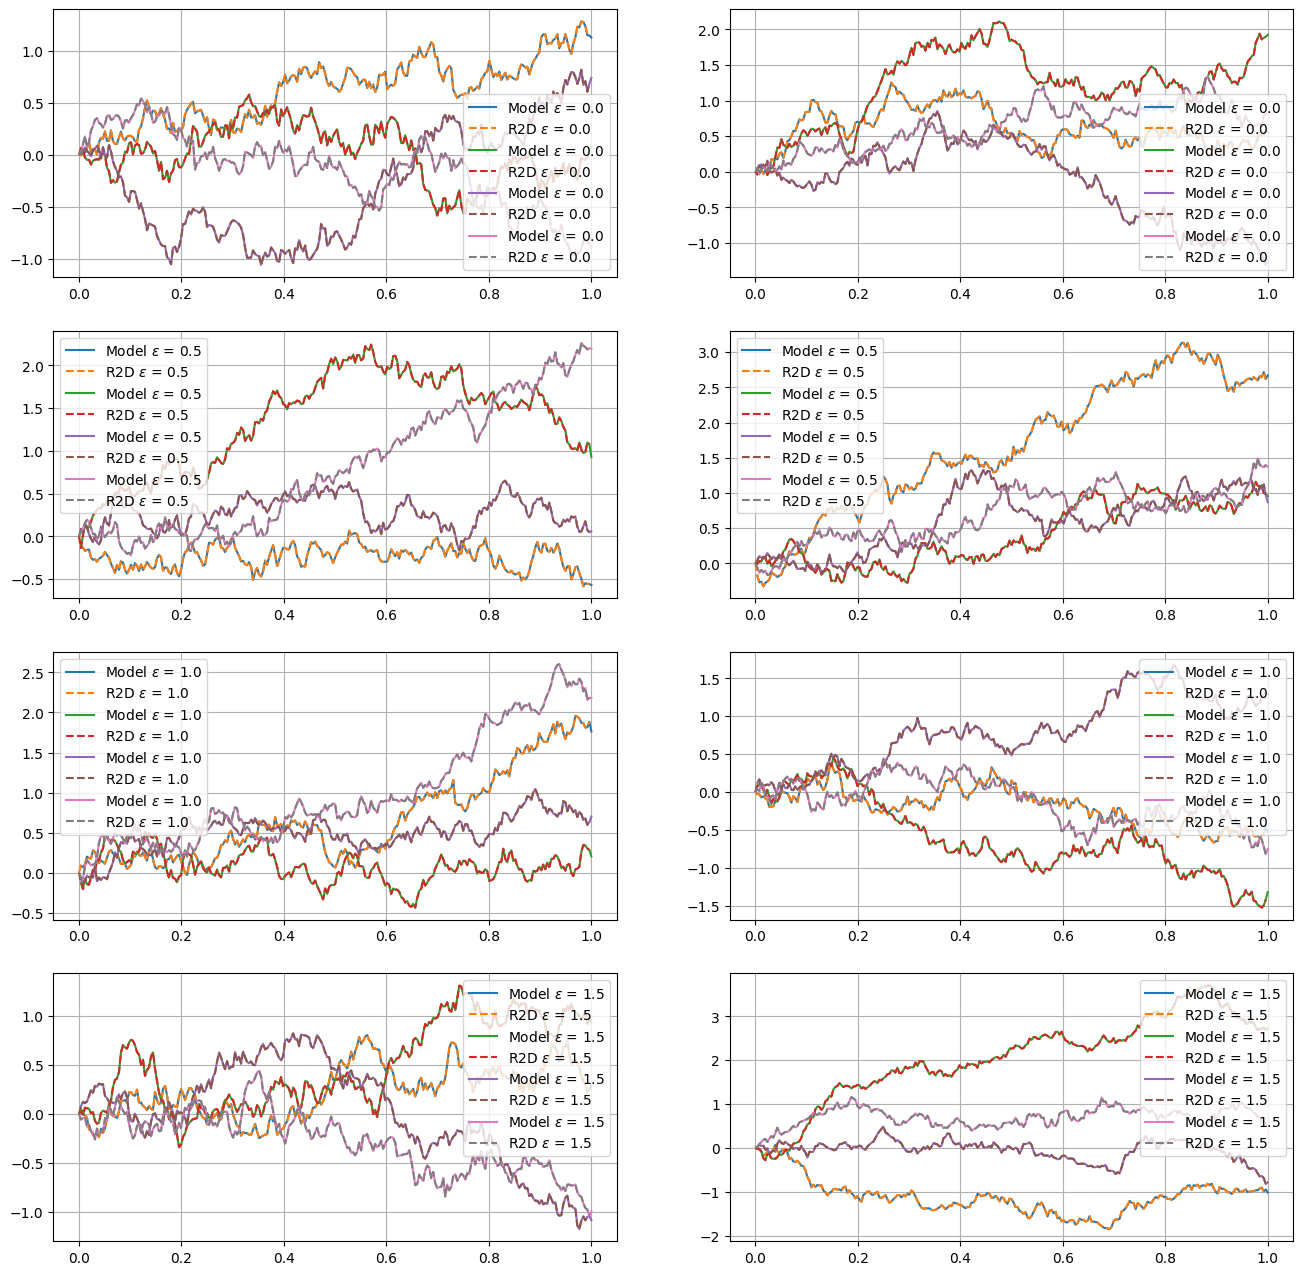

In [29]:
plt.figure(figsize=(16,16))
plot_traj = 4
plotidx = 1
for epsidx in range(0,epsilons.shape[0],10):
  for qidx in range(2):
    plt.subplot(4,2,plotidx)

    for trajidx in range(plot_traj):
      idx = epsidx*num_traj+trajidx
      eps = all_params_traj[idx,0].numpy()
      plt.plot(rnntvec, model_out[idx,:,qidx,0,0], label=f'Model $\epsilon$ = {eps}')
      plt.plot(tvec, ivec[idx,:,qidx], '--', label=f'R2D $\epsilon$ = {eps}')

    plt.legend()
    plt.grid();
    plotidx += 1

In [30]:
abs_errs = tf.reduce_max(tf.abs(model_out[:,:-1,:,0,0] - ivec[:,1:,:]), axis=1)
print(f'Max ERR:{tf.reduce_max(abs_errs, axis=0)}, mse shape = {abs_errs.shape}' )

Max ERR:[8.29566837e-09 3.10671933e-09], mse shape = (400, 2)


In [31]:
maxidx = tf.argmax(abs_errs[:,0]).numpy()
print(maxidx, abs_errs[maxidx,:])

36 tf.Tensor([8.29566837e-09 3.10671933e-09], shape=(2,), dtype=float64)


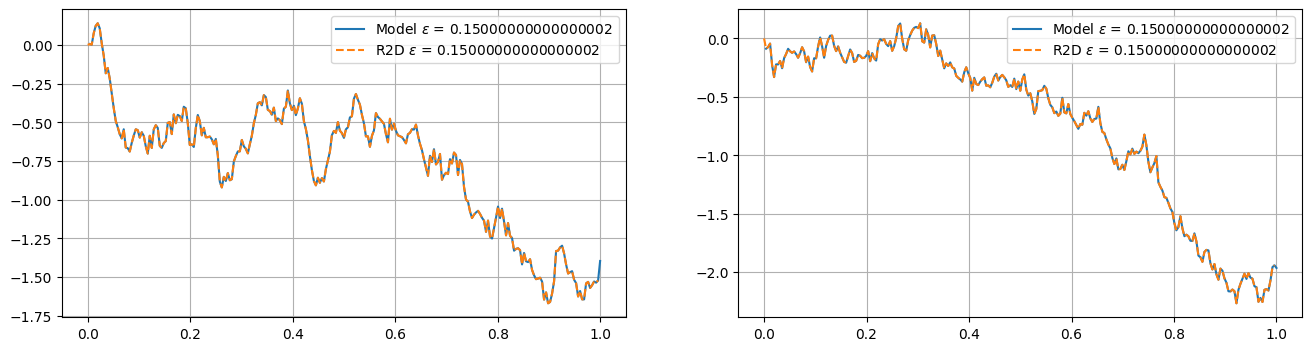

In [32]:
plt.figure(figsize=(16,4))
plotidx = 1
for qidx in range(2):
  plt.subplot(1,2,qidx+1)

  eps = all_params_traj[maxidx,0].numpy()
  plt.plot(rnntvec, model_out[maxidx,:,qidx,0,0], label=f'Model $\epsilon$ = {eps}')
  plt.plot(tvec, ivec[maxidx,:,qidx], '--', label=f'R2D $\epsilon$ = {eps}')

  plt.legend()
  plt.grid();

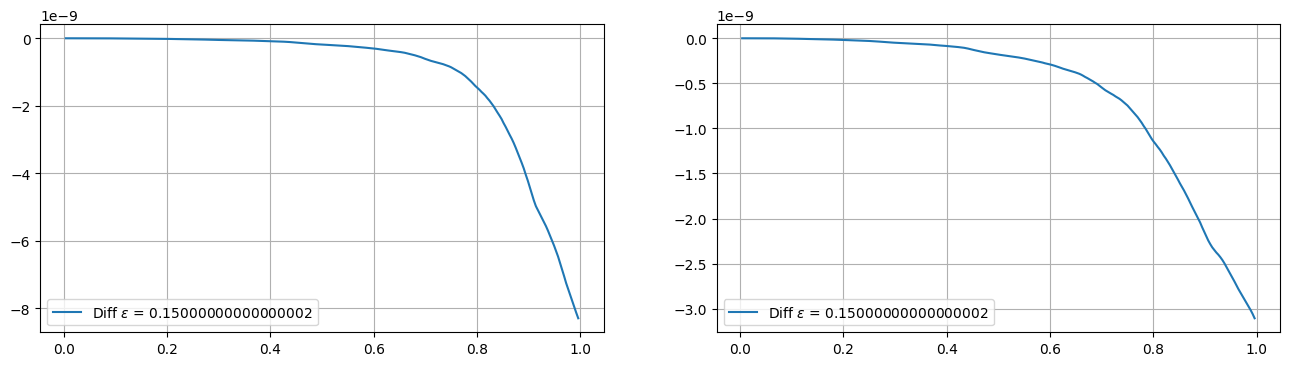

In [33]:
plt.figure(figsize=(16,4))
plotidx = 1
for qidx in range(2):
  plt.subplot(1,2,qidx+1)

  eps = all_params_traj[maxidx,0].numpy()
  plt.plot(rnntvec[:-1], model_out[maxidx,:-1,qidx,0,0] - ivec[maxidx,1:,qidx], label=f'Diff $\epsilon$ = {eps}')

  plt.legend()
  plt.grid();

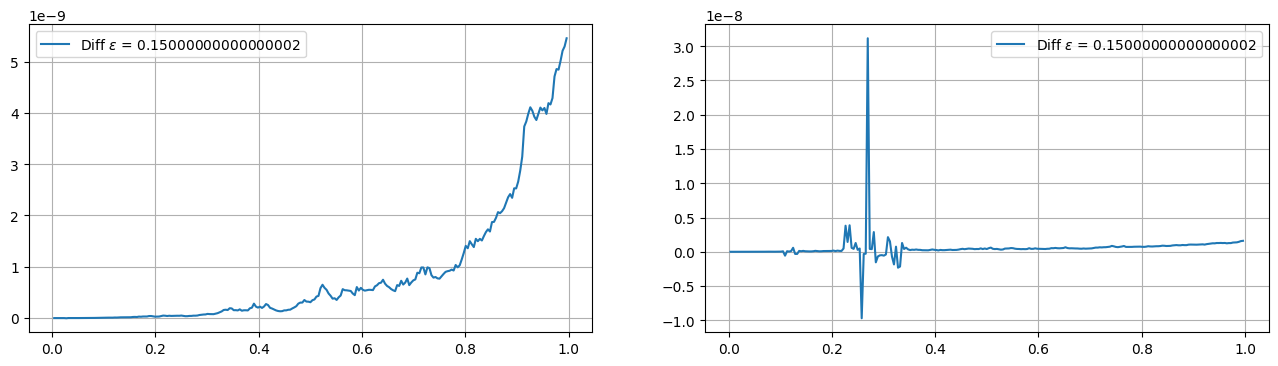

In [34]:
plt.figure(figsize=(16,4))
plotidx = 1
for qidx in range(2):
  plt.subplot(1,2,qidx+1)

  eps = all_params_traj[maxidx,0].numpy()
  plt.plot(rnntvec[:-1], (model_out[maxidx,:-1,qidx,0,0] - ivec[maxidx,1:,qidx])/model_out[maxidx,:-1,qidx,0,0], label=f'Diff $\epsilon$ = {eps}')

  plt.legend()
  plt.grid();

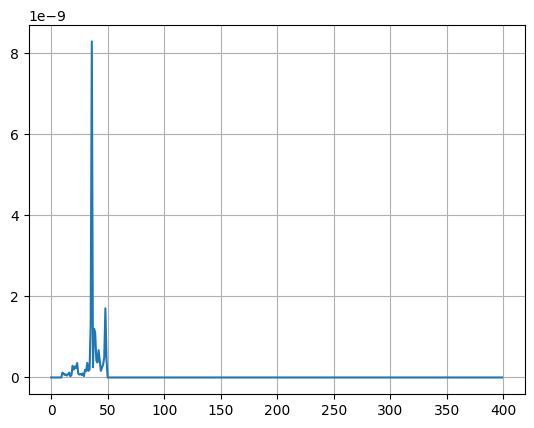

In [35]:
plt.plot(abs_errs[:,0])
plt.grid();

In [36]:
abs_errs[:,0]

<tf.Tensor: shape=(400,), dtype=float64, numpy=
array([0.00000000e+00, 6.80011603e-16, 6.93889390e-18, 1.11022302e-16,
       4.71844785e-16, 4.44089210e-16, 1.38777878e-17, 2.22044605e-16,
       2.08166817e-17, 0.00000000e+00, 1.19174781e-10, 9.46251966e-11,
       6.27833341e-11, 7.53445084e-11, 4.69966288e-11, 8.45374881e-11,
       1.17935661e-10, 3.13504778e-11, 6.14008844e-11, 2.87539936e-10,
       1.94835148e-10, 2.71328487e-10, 2.33556507e-10, 3.55687771e-10,
       9.51010382e-11, 7.09632353e-11, 8.74728068e-11, 6.27959906e-11,
       9.90985072e-11, 3.44329010e-11, 1.88161903e-10, 1.59701141e-10,
       3.60683483e-10, 1.63643765e-10, 1.93807415e-10, 1.31626318e-09,
       8.29566837e-09, 2.52172283e-10, 1.20212007e-09, 1.09288456e-09,
       4.18989732e-10, 3.70703246e-10, 6.74753586e-10, 4.23213645e-10,
       1.62663216e-10, 2.43894016e-10, 3.21322524e-10, 4.90768426e-10,
       1.70727710e-09, 4.37930359e-10, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.0000

In [37]:
model_out[maxidx,:10,qidx,0,0] - ivec[maxidx,1:11,qidx]

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([ 0.00000000e+00,  0.00000000e+00, -1.05471187e-15, -3.96904731e-15,
       -1.04916076e-14, -2.23709939e-14, -3.79418719e-14, -6.25055563e-14,
       -9.69224700e-14, -1.52100554e-13])>

In [38]:
(model_out[maxidx,:10,qidx,0,0] - ivec[maxidx,1:11,qidx])/model_out[maxidx,:10,qidx,0,0]

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-0.00000000e+00, -0.00000000e+00,  2.42011391e-14,  1.74761426e-14,
        3.17857995e-14,  1.01081601e-13,  1.70820028e-13,  3.25020063e-13,
        3.80752752e-13,  9.03942606e-13])>

In [39]:
import datetime
print(datetime.datetime.now())

2024-11-02 16:19:36.562295
